# 카이제곱 검정(Chi-square test)

- 범주형 변수들 간의 연관성을 분석하기 위해 결합분포를 사용하는 방법
    - 연령 같은 변수는 연령대와 같은 서열척도로 변환해서 사용할 수 있음
- 기본 원리는 변수들 간의 범주를 동시에 교차하는 교차표를 만들어 각각의 빈도와 비율을 통해 변수 상호 간의 독립성과 관련성을 분석 하는 것
- 교차분석은 상관분석과는 다르게 연관성의 정도를 수치로 표현할 수 업슴
    - 대신 검정 통계량 카이제곱을 통해 변수간에 연관성이 없다는 귀무가설을 기각하는지 여부로 상관성이 있고 없음을 판단

In [1]:
from scipy.stats import chi2_contingency
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
df = pd.read_csv("./data/smoker.csv")
df.head()

,sex,smoke
0,male,Non-Smoker
1,male,Smoker
2,male,Non-Smoker
3,male,Smoker
4,male,Non-Smoker


In [4]:
# 항목 별 집계
df.groupby(["sex", "smoke"])["smoke"].count()

sex     smoke     
female  Non-Smoker    50
        Smoker        12
male    Non-Smoker    40
        Smoker        29
Name: smoke, dtype: int64

- 남성과 여성의 흡연자와 비흡연자수 현황을 확인하기 위해 groupby() 함수로 집계 데이터를 산출
- 여성은 62명 중 12명이 흡연자고, 남성은 69명 중 29명이 흡연자임

In [5]:
# 카이제곱 검정용 데이터셋 가공
crosstab = pd.crosstab(df["sex"], df["smoke"]) # 교차표 생성
crosstab

smoke,Non-Smoker,Smoker
sex,,
female,50,12
male,40,29


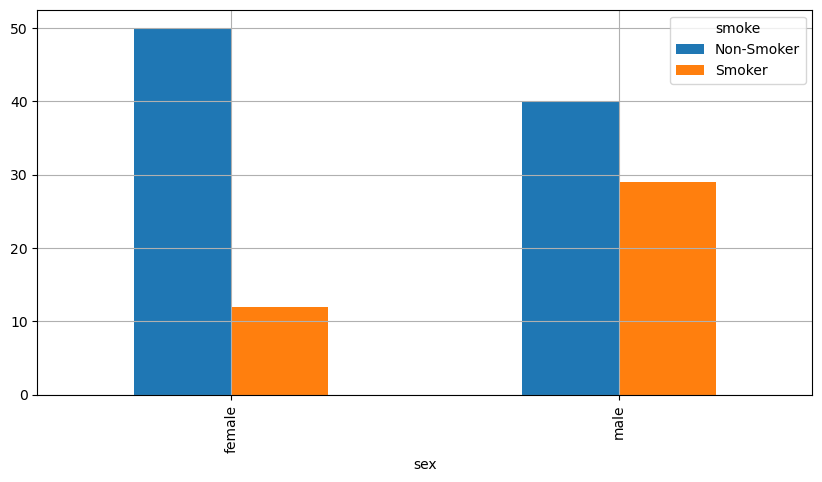

In [6]:
# 성별 별 흡연자 수 시각화
crosstab.plot(kind = "bar", figsize = (10, 5))
plt.grid()
plt.show()

- 카이제곱 검정을 하기에 앞서 항목별 분포를 막대그래프로 시각화
- 눈으로 보기에도 남성과 여성의 흡연자 비율 차이가 크게 남
    - 이러한 차이가 통계쩍으로 유의미한 차이인지 확인하기 위해 카이제곱 검정을 수행

In [7]:
# 카이제곱 검정
chiresult = chi2_contingency(crosstab, correction = False)
print(f"Chi square: {chiresult[0]}")
print(f"P-value: {chiresult[1]}")

Chi square: 7.8081404703715105
P-value: 0.005201139711454792


In [8]:
# 카이제곱 검정
chiresult = chi2_contingency(crosstab, correction = True)
print(f"Chi square: {chiresult[0]}")
print(f"P-value: {chiresult[1]}")

Chi square: 6.789242038107618
P-value: 0.009170883871905303


- correction : 표본의 크기가 작을 때 보정을 수행
    - 일반적으로는 True를 많이 사용함
- p-value가 0.05보다 작게 나타나 성별에 따른 흡연자 비율 차이가 통계적으로 유의함